# NN with keras to identify numbers 

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2024-11-21 16:46:41.084881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-21 16:46:41.084965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-21 16:46:41.087591: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 16:46:41.101550: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 16:46:42.863211: W tensorflow/compiler/tf2

2.15.0


In [2]:
# charging the data 

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2


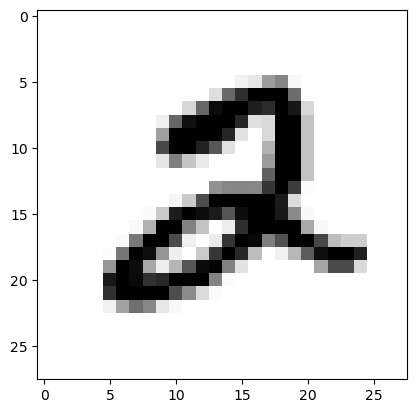

In [3]:
num_to_show: int = 5
plt.imshow(x_train[num_to_show], cmap=plt.cm.binary)
print(y_train[num_to_show])

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Procesing the data for the network

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [6]:
x_train.shape[0]

60000

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
size_2: int = 28*28

x_train = x_train.reshape(x_train.shape[0], size_2)
x_test  = x_test.reshape(x_test.shape[0], size_2)


In [9]:
x_train, x_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

 Now lets create the network, for that we will encode the info with one-hot codification

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

print(y_test[0]) 

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
print(y_test[4]) 

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Creating the network model

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential([
    Dense(10, activation='ReLU', input_shape=(size_2,)),
    Dense(10, activation='softmax')
])

2024-11-21 16:46:47.882941: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 16:46:47.942680: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# defining the characteristics of the network 
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics = ['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5247 - accuracy: 0.8516
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2762 - accuracy: 0.9225
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2626 - accuracy: 0.9265
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2525 - accuracy: 0.9287


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.9266


In [19]:
test_loss, test_acc

(0.2588072121143341, 0.9265999794006348)

In [20]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step


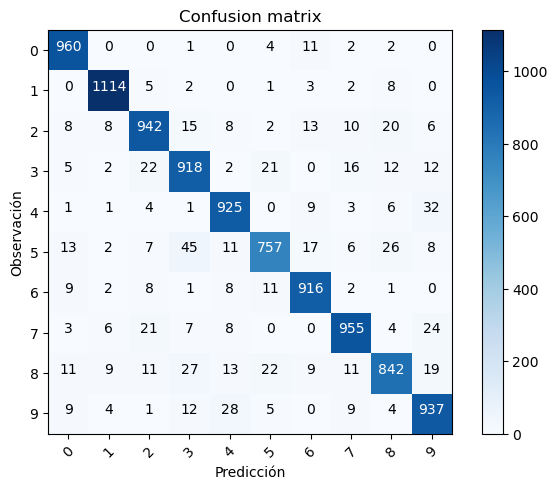

In [21]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Generation predictions

In [22]:
x_test_old = x_test.reshape(x_test.shape[0], 28, 28)

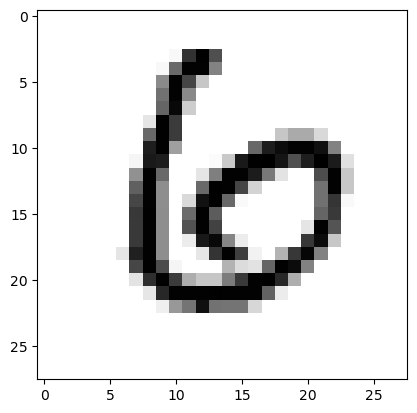

In [23]:
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [24]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [25]:
np.argmax(predictions[11])

6

In [26]:
np.argmax(predictions[4])

4

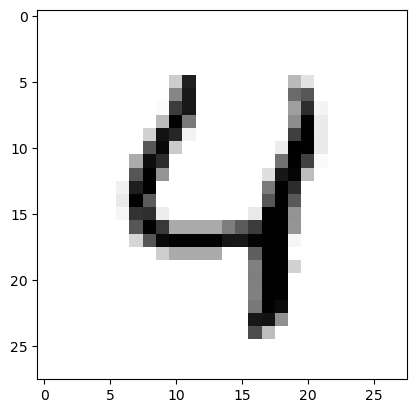

In [27]:
plt.imshow(x_test_old[4], cmap=plt.cm.binary)

# Now some data from fashion in MNIST

In [70]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [71]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [72]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [73]:
np.set_printoptions(precision=2, suppress=True, linewidth=120) 
print(np.matrix(train_images[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [74]:
np.max(train_images[0])

255

In [75]:
train_images = train_images.astype('float32')
test_images  = test_images.astype('float32')

train_images /= 255.0 
test_images  /= 255.0 

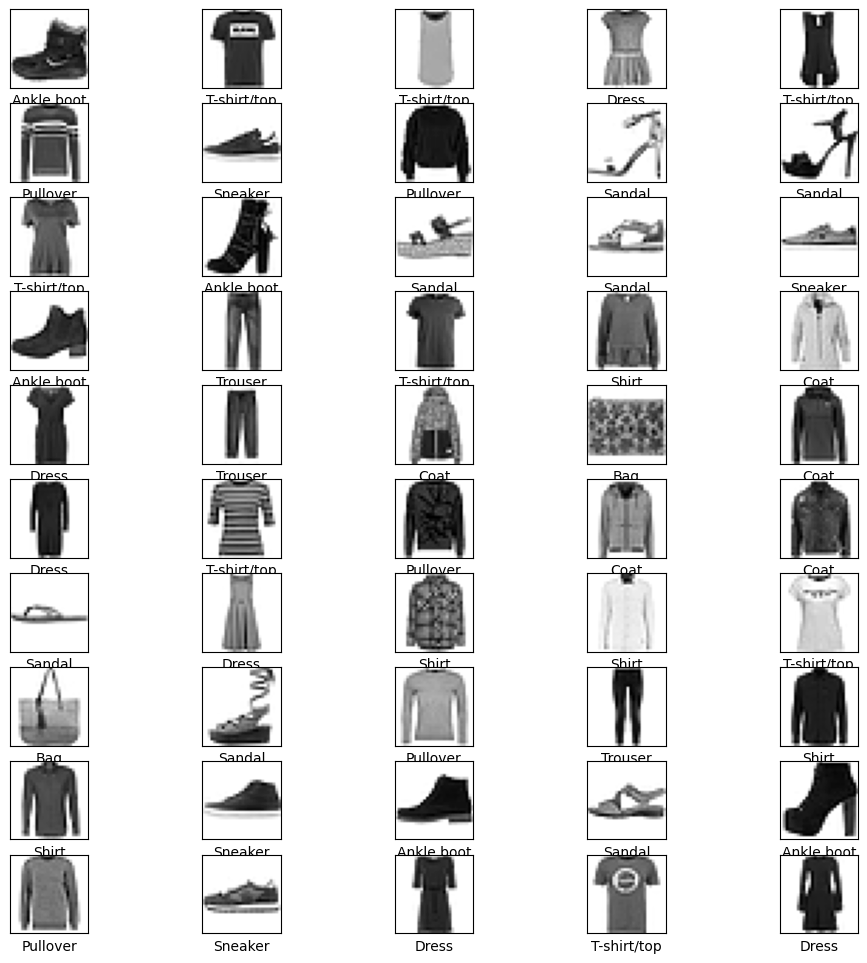

In [76]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [77]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
#creating the network

model = Sequential([
    Flatten(input_shape=(28,28)), 
    Dense(100, activation="ReLU"),
    Dense(50, activation="ReLU"),
    Dense(30, activation='softmax')
])

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 30)                1530      
                                                                 
Total params: 85080 (332.34 KB)
Trainable params: 85080 (332.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5188 - accuracy: 0.8182
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3780 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3390 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3183 - accuracy: 0.8826
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2992 - accuracy: 0.8895


In [82]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.3416 - accuracy: 0.8800


(0.3416498005390167, 0.8799999952316284)

In [83]:
predic = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [84]:
predic[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [85]:
np.argmax(predic[5])

1

In [86]:
test_labels[5]

1

In [87]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

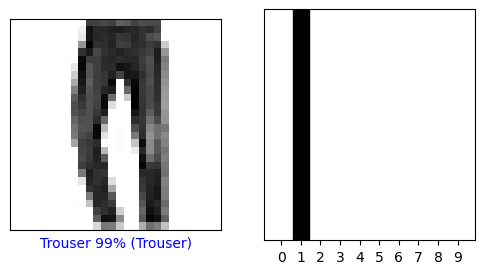

In [88]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

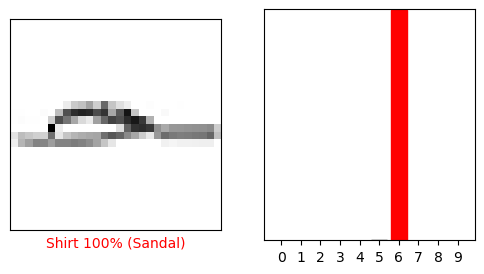

In [89]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

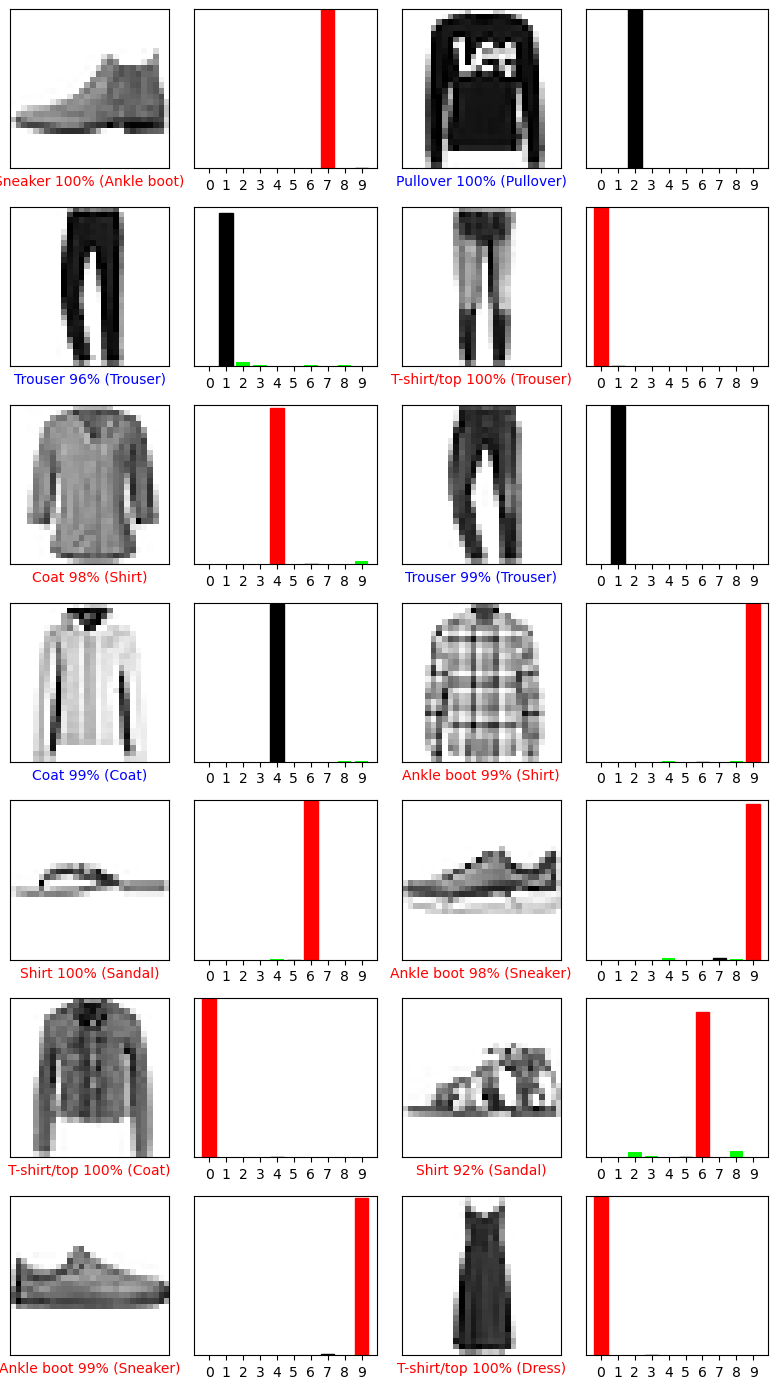

In [90]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


As we see this simple model is not good. We need to use a more complex model, using a convolutional nn